This tutorial is largely based on [Tutorial1@Kaggle](https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners) and plotly basics: https://plotly.com/python/

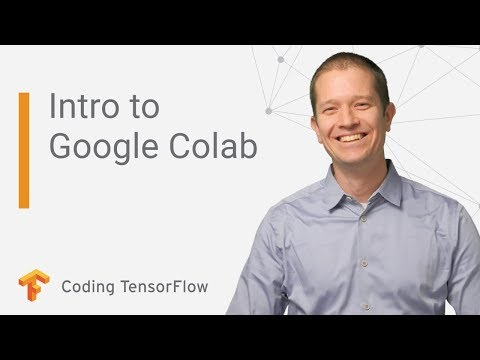

In [ ]:
#@title Introducing Colaboratory { display-mode: "form" }
#@markdown This 3-minute video gives an overview of the key features of Colaboratory:

from IPython.display import YouTubeVideo
YouTubeVideo('inN8seMm7UI', width=600, height=400)

# Plotly Structure Overview
![Plotly Structure Overview](https://drive.google.com/uc?id=1UFqtfPdrDRAIKGAyD7fXhsw3CvdT3BYV) 

# Getting Started
First install Plotly library 

In [ ]:
!pip install plotly==4.9.0

     |████████████████████████████████| 12.9 MB 6.1 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=0df21b4bac4933844dc2dfab76a61b40c6cc856b41b1131a05621180c2c9c543
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
# play with pandas
import pandas as pd
import os

df = pd.read_csv('temp.csv', index_col=['r', 'c1'], dtype={'c1':int, 'c2':float, 'c3': object})
print(df.info(),end='\n\n')
print(df,end='\n\n')

print(df[df['c2']==5].loc[:,'c3'], end='\n\n')

print(df[df['c2'].apply(pd.to_numeric)%2==0].index, end='\n\n')

df.iloc[1,:]
#df.loc[1]

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3 entries, ('r1', 1) to ('r3', 7)
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   c2      3 non-null      float64
 1   c3      3 non-null      object 
dtypes: float64(1), object(1)
memory usage: 419.0+ bytes
None

        c2 c3
r  c1        
r1 1   2.0  3
r2 4   5.0  6
r3 7   8.0  9

r   c1
r2  4     6
Name: c3, dtype: object

MultiIndex([('r1', 1),
            ('r3', 7)],
           names=['r', 'c1'])



c2    5.0
c3      6
Name: (r2, 4), dtype: object

In [ ]:
# plot sine

import numpy as np
from plotly import graph_objs as go

x = np.arange(0, np.pi*4, 0.1)

data = [
  go.Scatter(x=x, y=np.sin(x)),
  go.Scatter(x=x, y=np.cos(x))
]
layout={
  'title': "it's my first plot!",
  'xaxis':{'title':'radians'},
  'yaxis':{'title':'amplitude'}
}

fig = go.Figure(data, layout)
fig.show()

# Dataset - "World University Ranking"
We'll use the dataset called "World University Rankings" from 2011 to 2016 (six years). 

---



https://www.kaggle.com/mylesoneill/world-university-rankings

In [ ]:
import pandas as pd

timesData = pd.read_csv('https://imc.kentech.ac.kr/wikipages/files/timesData.csv')
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [ ]:
timesData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


# Line Plots

In [ ]:
# prepare data frame
df = timesData.iloc[:100,:]

# import graph objects as "go"
import plotly.graph_objs as go
from plotly.offline import iplot

# trace1 - lines 
# https://plotly.com/python-api-reference/generated/plotly.graph_objects.Scatter.html
trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'), # RGB (red, green, blue) and opacity (alpha)
                    text= df.university_name) # hover text  

# trace2 - lines + markers 
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines+markers",
                    name = "teaching",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= df.university_name) # hover text  

# trace3 - markers 
trace3 = go.Scatter(
                    x = df.world_rank,
                    y = df.total_score,
                    mode = "markers",
                    name = "research",
                    marker = dict(color = 'rgba(120, 150, 20, 0.8)'),
                    text= df.university_name) # hover text  

data = [trace1, trace2, trace3]

# more detailed information about layout 
# https://plotly.com/python-api-reference/generated/plotly.graph_objects.Layout.html

layout = dict(title = 'Citation, Teaching, Research vs World Rank of Top 100 Universities',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False)
             )
 
fig = go.Figure(data = data, layout = layout)
fig.show() 
 
 

# Scatter Plots - Relationship

In [ ]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]
# import graph objects as "go"

import plotly.graph_objs as go

# creating trace1
trace1 =go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2014.university_name)
# creating trace2
trace2 =go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2015.university_name)
# creating trace3
trace3 =go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2016.university_name)
data = [trace1, trace2, trace3]

layout = dict(title = 'Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False)
             )

fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
import pandas as pd  
import numpy as np

import plotly.graph_objects as go

#timesData = pd.read_csv("drive/My Drive/Datasets/timesData.csv")
timesData = pd.read_csv('https://imc.kentech.ac.kr/wikipages/files/timesData.csv') 

# get rid of the rows w/ non-numeric values 
Y2015 = timesData[timesData.year == 2015]
Y2015 = Y2015[Y2015.total_score != '-']
Y2015['total_score'] = Y2015.total_score.astype(float) 
 
trace1 = go.Scatter(
    x = Y2015.world_rank,
    y = Y2015.citations,
 
    mode='markers',
    marker=dict(
        #size=Y2015.total_score, # if we want to show a bubble chart... 
        size = 10,
        color = Y2015.total_score, # color scale mapping 
        colorscale='Viridis',     # plotly colorscale 구글링
        showscale=True
    ),
    text=Y2015.university_name
)
data = [trace1]
 
fig = go.Figure(data=data) 
fig.show() 

# Scatterplot Matrix - Relationship

In [ ]:
# https://plotly.com/python/splom/

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris-data.csv')

print('df.head()')
print(df.head())

# The Iris dataset contains four data variables, sepal length, sepal width, petal length,
# petal width, for 150 iris flowers. The flowers are labeled as `Iris-setosa`,
# `Iris-versicolor`, `Iris-virginica`.

# Define indices corresponding to flower categories, using pandas label encoding
index_vals = df['class'].astype('category').cat.codes
# cast it into "categorical data" type, and then get its numeric code 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

print('indices')
print(index_vals)

df.head()
   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
indices
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int8


In [ ]:
# Splom = S plot matrix
fig = go.Figure(data=go.Splom(
                dimensions=[dict(label='sepal length',
                                 values=df['sepal length']),
                            dict(label='sepal width',
                                 values=df['sepal width']),
                            dict(label='petal length',
                                 values=df['petal length']),
                            dict(label='petal width',
                                 values=df['petal width'])],
                text=df['class'],
                
                marker=dict(color=index_vals,
                            colorscale='Viridis',
                            showscale=False, # colors encode categorical variables
                            line_color='white', line_width=0.5)
                ))


fig.update_layout(
    title='Iris Data set',
    dragmode='select',
    width=600,
    height=600,
    hovermode='closest',
)

fig.show()

# Box Plots -  Distributions 

Box plots for visualizing distribution. Let's first add each plot to the figure. 

boxpoints='all' -- setting this option allows you to display raw data points right beside the boxplot. 

In [ ]:
from plotly import graph_objs as go
import pandas as pd
import numpy as np

# play with data to see why we need to preprocess data! (e.g. )
df = timesData[timesData.total_score != '-']
df = df.astype({'total_score': float})

x2011 = df[df.year == 2011]
x2012 = df[df.year == 2012]
x2013 = df[df.year == 2013]
x2014 = df[df.year == 2014]
x2015 = df[df.year == 2015]
x2016 = df[df.year == 2016]
#['rgb(127,201,127)','rgb(190,174,212)','rgb(253,192,134)','rgb(255,255,153)','rgb(56,108,176)','rgb(240,2,127)']

trace11 = go.Box(
    y=x2011.total_score,
    name = '2011',
    marker = dict(
        color = '#3D9970',
    )
)
trace12 = go.Box(
    y=x2012.total_score,
    name = '2012',
    marker = dict(
        color = '#3D9970',
    )
)
trace13 = go.Box(
    y=x2013.total_score,
    name = '2013',
    marker = dict(
        color = '#3D9970',
    )
) 
trace14 = go.Box(
    y=x2014.total_score,
    name = '2014',
    marker = dict(
        color = '#3D9970',
    )
)
trace15 = go.Box(
    y=x2015.total_score,
    name = '2015',
    marker = dict(
        color = '#3D9970',
    )
)
print(x2016.total_score)
trace16_1 = go.Box(
    y=x2016.total_score,
    name = '2016',
    marker = dict(
        color = '#3D9970',
    )
)
trace16 = go.Box(
    y=x2016.total_score,
    name = '2016',
    marker = dict(
        color = '#3D9970',
    ),
     boxpoints='all',
     jitter=0.5,
     whiskerwidth=0.2, 
     marker_size=2,
     line_width=2,   
     text= x2016.university_name
) 
data = [trace11, trace12, trace13, trace14, trace15, trace16_1]

layout = dict(title = 'Total Score Distribution over Different Year',
              xaxis= dict(title= 'Year', ticklen= 5, zeroline= False),
              yaxis= dict(title= 'Total Score', ticklen= 5, zeroline= False)
             )
 
fig = go.Figure(data = data, layout = layout)
fig.update_layout(showlegend=False)

fig.show() 
 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 2002
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              1201 non-null   object 
 1   university_name         1201 non-null   object 
 2   country                 1201 non-null   object 
 3   teaching                1201 non-null   float64
 4   international           1201 non-null   object 
 5   research                1201 non-null   float64
 6   citations               1201 non-null   float64
 7   income                  1201 non-null   object 
 8   total_score             1201 non-null   float64
 9   num_students            1182 non-null   object 
 10  student_staff_ratio     1182 non-null   float64
 11  international_students  1181 non-null   object 
 12  female_male_ratio       1078 non-null   object 
 13  year                    1201 non-null   int64  
dtypes: float64(5), int64(1), object(8)
memor

Instead of adding each plot one by one, you can use "boxmode='group'" to simplify plotting - it's groupby "x"-axis that you set (here, "year"). This results in the same plot. 

In [ ]:
import plotly.graph_objects as go
 
# play with data to see why we need to preprocess data! (e.g. )
df = timesData[timesData.total_score != '-']
df = df.astype({'total_score': float})

trace = go.Box(
  x=timesData.year,
  y=df.total_score,
  name='Total Score',
  marker_color='#3D9970' 
)

layout = dict(yaxis=dict(title='Total Score', zeroline=False),
    xaxis=dict(title='Year', zeroline=False),
    boxmode='group')

fig = go.Figure(data = trace, layout = layout) 
#fig.update_layout(showlegend=False)
 
#fig.update_traces(orientation='h') # horizontal box plots
fig.show()

Previously, we defined (1) data trace (2) layout, and then you put them into go.Figure().  

Instead, you can define go.Figure() first, and then directly call functions in each step: add_trace and update_layout. 

In [ ]:
import plotly.graph_objects as go

# play with data to see why we need to preprocess data! (e.g. )
df = timesData[timesData.total_score != '-']
df = df.astype({'total_score': float})

fig = go.Figure()
fig.add_trace(go.Box(
  x=timesData.year,
  y=df.total_score,
  name='Total Score',
  marker_color='#3D9970'
))

fig.update_layout(
    yaxis=dict(title='Total Score', zeroline=False),
    xaxis=dict(title='Year', zeroline=False),
    boxmode='group'
) 
fig.show()

You can easily draw grouped box plots, by adding "box plots" (in groupmode). 

For color selection, please use Color Brewer: https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3

In [ ]:
import plotly.graph_objects as go

# play with data to see why we need to preprocess data! (e.g. )
df = timesData[timesData.total_score != '-']
df = df.astype({'total_score': float})

x1 = df[df.country == 'United States of America']
x2 = df[df.country == 'United Kingdom']
x3 = df[df.country == 'South Korea'] 
x4 = df[df.country == 'Japan'] 
x5 = df[df.country == 'China']
 
fig = go.Figure()

fig.add_trace(go.Box(
  x=x1.year,
  y=x1.total_score,
  name='USA',
  marker_color='#7fc97f'
))

fig.add_trace(go.Box(
  x=x2.year,
  y=x2.total_score,
  name='United Kingdom',
  marker_color='#beaed4'
))

fig.add_trace(go.Box(
  x=x3.year,
  y=x3.total_score,
  name='South Korea',
  marker_color='#fdc086'
))

fig.add_trace(go.Box(
  x=x4.year,
  y=x4.total_score,
  name='Japan',
  marker_color='#386cb0'
))

fig.add_trace(go.Box(
  x=x5.year,
  y=x5.total_score,
  name='China',
  marker_color='#fccde5'
))

fig.update_layout(
    yaxis=dict(title='Total Score', zeroline=False),
    xaxis=dict(title='Year', zeroline=False),
    boxmode='group'
)
# text= df2014.university_name
#fig.update_traces(orientation='h') # horizontal box plots
#fig.show()

# Histogram & Density Plots  -  Distributions 

https://plotly.com/python/distplot/

https://plotly.github.io/plotly.py-docs/generated/plotly.figure_factory.create_distplot.html 

In [ ]:
import pandas as pd 
import plotly.figure_factory as ff

#timesData = pd.read_csv("drive/My Drive/Datasets/timesData.csv")
timesData = pd.read_csv('https://imc.kentech.ac.kr/wikipages/files/timesData.csv') 

Y2015 = timesData[timesData.year == 2015]

# Citations, Teaching, Research 
# Group data together
hist_data = [Y2015.citations, Y2015.teaching, Y2015.research]

group_labels = ['Citations', 'Teaching', 'Reearch']
 
# bin_size ((list[float]|float)) – Size of histogram bins. Default = 1. 
fig = ff.create_distplot(hist_data, group_labels)
# fig = ff.create_distplot(hist_data, group_labels, bins=30) # bins : more wider
fig.show()

# Use custom bin size 
# fig = ff.create_distplot(hist_data, group_labels, bin_size=[.1, .25, .5, 1])

# Create distplot with curve_type set to 'normal'
#fig = ff.create_distplot([x1, x2], group_labels, bin_size=.5,
#                         curve_type='normal', # override default 'kde'
#                         colors=colors)

# Sensor Data Visualization

First, please download [KAISTDataset.zip](https://drive.google.com/drive/u/1/folders/1rXRk8IjSxCGH0sCXzybXhXyFNnqSGAyF) file, and unzip and put the file inside your class folder '/content/drive/My Drive/SensorDataScience/KAISTDataset/' We are going to read the csv files in KAISTDataset folders.

Mount a Google Drive by executing code.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Visualizaing Raw Sensor Data

In [ ]:
from os import listdir
from os.path import isfile, join
import pandas as pd 
import numpy as np
import sys

# (1) load accelerometer data
#accelerometer = pd.read_csv(join(dataset_directory, 'Accelerometer.csv')) 
accelerometer = pd.read_csv('https://imc.kentech.ac.kr/wikipages/files/Acc.csv') 
  # Here, "sys.join helps you to *correctly* generate a full file path

# (2) set timestamp as a new index
accelerometer.set_index('timestamp', drop=True, inplace=True) 
# drop : bool, default True / Delete columns to be used as the new index.
# inplace : bool, default False / Modify the DataFrame in place (i.e., do not create a new object).

accelerometer.head()
#accelerometer.columns

,Y,X,Z
timestamp,,,
1.556950e+12,-0.838379,-0.376221,-0.352539
1.556950e+12,-0.837646,-0.374023,-0.354492
1.556950e+12,-0.806152,-0.365723,-0.358398
1.556950e+12,-0.828369,-0.382568,-0.364258
1.556950e+12,-0.828613,-0.375488,-0.364502


Using fuction of **pd.to_datetime()**, let's create and set new_timestamps as a new index. The previous index will then be dropped.

In [ ]:
accelerometer['timestamp'] = pd.to_datetime(accelerometer.index, unit='ms') # create new_timestamps column and put datatime
accelerometer['old_timestamp'] = accelerometer.index # we still need old_timestamps to label motion type information.
accelerometer.set_index('timestamp', drop=True, inplace=True) # set new_timestamps as new index. the previous index will be dropped
accelerometer.head()

,Y,X,Z,old_timestamp
timestamp,,,,
2019-05-04 06:06:40,-0.838379,-0.376221,-0.352539,1.556950e+12
2019-05-04 06:06:40,-0.837646,-0.374023,-0.354492,1.556950e+12
2019-05-04 06:06:40,-0.806152,-0.365723,-0.358398,1.556950e+12
2019-05-04 06:06:40,-0.828369,-0.382568,-0.364258,1.556950e+12
2019-05-04 06:06:40,-0.828613,-0.375488,-0.364502,1.556950e+12


Due to the volume of data, we'll use only the first 500 rows of the accelerometer dataset.  

In [ ]:
accelerometer_500 = accelerometer.head(500)

Let's draw line plots that display the 3-axis accelerometer signals.

In [ ]:
import plotly.graph_objects as go
import pandas as pd

fig.add_trace(go.Scatter(x=accelerometer_500.index, y=accelerometer_500.X, mode='lines', name ='X'))
fig.add_trace(go.Scatter(x=accelerometer_500.index, y=accelerometer_500.Y, mode='lines', name ='Y'))
fig.add_trace(go.Scatter(x=accelerometer_500.index, y=accelerometer_500.Z, mode='lines', name ='Z'))

fig.update_layout(template='plotly_white', showlegend=True, title = 'Accelerometer', xaxis_title ='time', yaxis_title='Acceleromter (X,Y,Z)')

fig.show()

## Visualizing Extracted Features 

Load features.csv from K-EmoPhone dataset. 

*  This dataset include the features such as magnitude, mean, max, min, and standard deviation, extracted from the raw accelerometer data (w/ window size of 600 ms) 
*   This preprocessed data is scaled each feature using MinMaxScaler, where values are bounded to a range from 0 to 1; for a given input X, minmax = (X - x_min) / (x_max - x_min). For details about scaling, please read [this blog article](https://sebastianraschka.com/Articles/2014_about_feature_scaling.html).


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# (1) load FEATURES_TIME_SCALED data
Features = pd.read_csv('https://imc.kentech.ac.kr/wikipages/files/Features.csv')

# (2) set timestamp as a new index
Features.set_index('feature', drop=True, inplace=True) 
# drop : bool, default True / Delete columns to be used as the new index.
# inplace : bool, default False / Modify the DataFrame in place (i.e., do not create a new object).

Features.head()
#Features.columns

,timestamp,Max-mag,Max-x,Max-y,Max-z,Mean-mag,Mean-x,Mean-y,Mean-z,Min-mag,Min-x,Min-y,Min-z,Std-mag,Std-x,Std-y,Std-z,label
feature,,,,,,,,,,,,,,,,,,
0,3000,1.000000,0.656965,0.500000,1.000000,0.000000,0.000000,0.000000,0.057562,0.000000,0.000000,0.000000,0.0,0.756475,0.733741,1.000000,0.773076,1
1,3600,1.000000,1.000000,0.500000,1.000000,0.254487,0.373878,0.210496,0.073071,0.158413,0.000000,0.249271,0.0,1.000000,1.000000,0.981580,0.799061,1
2,4200,1.000000,1.000000,0.500000,1.000000,0.489824,0.611396,0.484780,0.132727,0.170032,0.000000,0.387755,0.0,0.991056,0.929365,0.777363,0.903417,1
3,4800,1.000000,1.000000,0.500000,1.000000,0.687958,0.831169,0.668337,0.231264,0.293173,0.200000,0.504373,0.0,0.898066,0.733941,0.522876,1.000000,1
4,5400,0.683725,1.000000,0.421512,0.540365,0.863547,1.000000,0.739701,0.491326,0.434791,0.434615,0.655977,0.0,0.601289,0.485610,0.410975,0.994530,1


In [ ]:
labelMap = {
  1: 'Working at Computer',
  2: 'Standing Up, Walking and Going up\down stairs',
  3: 'Standing',
  4: 'Walking',
  5: 'Going Up\Down Stairs',
  6: 'Walking and Talking with Someone',
  7: 'Talking while Standing',
}

for label_in_integer in labelMap: 
  Features.loc[Features['label'] == label_in_integer, 'str_label'] = labelMap[label_in_integer]

Features.head()

,timestamp,Max-mag,Max-x,Max-y,Max-z,Mean-mag,Mean-x,Mean-y,Mean-z,Min-mag,Min-x,Min-y,Min-z,Std-mag,Std-x,Std-y,Std-z,label,str_label
feature,,,,,,,,,,,,,,,,,,,
0,3000,1.000000,0.656965,0.500000,1.000000,0.000000,0.000000,0.000000,0.057562,0.000000,0.000000,0.000000,0.0,0.756475,0.733741,1.000000,0.773076,1,Working at Computer
1,3600,1.000000,1.000000,0.500000,1.000000,0.254487,0.373878,0.210496,0.073071,0.158413,0.000000,0.249271,0.0,1.000000,1.000000,0.981580,0.799061,1,Working at Computer
2,4200,1.000000,1.000000,0.500000,1.000000,0.489824,0.611396,0.484780,0.132727,0.170032,0.000000,0.387755,0.0,0.991056,0.929365,0.777363,0.903417,1,Working at Computer
3,4800,1.000000,1.000000,0.500000,1.000000,0.687958,0.831169,0.668337,0.231264,0.293173,0.200000,0.504373,0.0,0.898066,0.733941,0.522876,1.000000,1,Working at Computer
4,5400,0.683725,1.000000,0.421512,0.540365,0.863547,1.000000,0.739701,0.491326,0.434791,0.434615,0.655977,0.0,0.601289,0.485610,0.410975,0.994530,1,Working at Computer


PlotLineGraph visualizes raw data w/ labels.

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

def plotLineGraph(plot_data, title, yaxis_title_text, label_data = None):  
  fig = go.Figure()

  for column in plot_data.columns:
    if 'label' not in column and 'timestamp' not in column:
      fig.add_trace(
        go.Scatter(
          x=plot_data['timestamp'],
          y=plot_data[column],
          name=column
        )
      )

  if label_data is not None:
    act_start = label_data[label_data['label'] != label_data.shift(1)['label']] 
    # table 복사해서 아래로 shift 한번. 두개 table 비교해보면 시작점은 같은게 없음.
    act_end = label_data[label_data['label'] != label_data.shift(-1)['label']]

    fig.update_layout(
      shapes=[
        go.layout.Shape(
          x0=s.timestamp, x1=e.timestamp, y0=0, y1=1, yref='paper', 
          # paper (normalized coordinate) y-reference is assigned to the plot paper [0,1] see more: https://plot.ly/python/shapes/
        ) for s, e in zip(act_start.itertuples(), act_end.itertuples())
      ],
      annotations=[
        go.layout.Annotation( # if you are interested in details, see https://plot.ly/python/text-and-annotations/ 
          text=s.label, x=s.timestamp + (e.timestamp - s.timestamp) / 2, y=1, yref='paper', hovertext = e.str_label
        ) for s, e in zip(act_start.itertuples(), act_end.itertuples())
      ],
      xaxis_title_text= '$Timestamps~(ms)$',
      yaxis_title_text= yaxis_title_text,
      title= title
    )

  fig.show()

Visualize Features on Time Domain

In [ ]:
plotLineGraph(Features, 'Feature value traces', '$Feature value$', Features)

## Interactive Visualization: Focus + Context

"Focus + Context" is a well-known data viz technique that allows you to present both the context (entire dataset) and the focus (specific selection in details). You can drag the range slider to pan, or change the size of the slider (or bush) to zoom. 

We'll analyze how accelerometer signals are related with heart rate data (beat per minute, or BPM) by displaying Focus + Context. We'll draw vertically stacked subplots with range selector buttons at the top, and the context view at the bottom. 

For color selection, you may want to check out color codes in Plotly: https://plotly.com/python/discrete-color/ 

In [ ]:
import plotly.graph_objects as go
import pandas as pd

AccBPM = pd.read_csv('https://imc.kentech.ac.kr/wikipages/files/AccBPM.csv') 
  
# set timestamp as a new index
AccBPM.set_index('timestamp', drop=True, inplace=True) 
# drop : bool, default True / Delete columns to be used as the new index.
# inplace : bool, default False / Modify the DataFrame in place (i.e., do not create a new object).

AccBPM.head() 

,acc_Y,acc_X,acc_Z,BPM,old_timestamp,label
timestamp,,,,,,
2019-05-04 05:33:00.300,NaN,NaN,NaN,74.0,1.556948e+12,UNKNOWN
2019-05-04 05:33:00.600,-0.838013,-0.375122,-0.353516,NaN,1.556948e+12,UNKNOWN
2019-05-04 05:33:00.900,-0.817261,-0.374146,-0.361328,NaN,1.556948e+12,UNKNOWN
2019-05-04 05:33:01.200,-0.821655,-0.373047,-0.359375,74.0,1.556948e+12,UNKNOWN
2019-05-04 05:33:01.500,-0.834147,-0.375570,-0.352946,NaN,1.556948e+12,UNKNOWN


In [ ]:
AccBPM.dropna(axis=0, inplace=True)
AccBPM.head()

,acc_Y,acc_X,acc_Z,BPM,old_timestamp,label
timestamp,,,,,,
2019-05-04 05:33:01.200,-0.821655,-0.373047,-0.359375,74.0,1.556948e+12,UNKNOWN
2019-05-04 05:33:02.400,-0.839844,-0.370117,-0.349365,74.0,1.556948e+12,UNKNOWN
2019-05-04 05:33:03.300,-0.842163,-0.359253,-0.340454,74.0,1.556948e+12,UNKNOWN
2019-05-04 05:33:04.200,-0.837809,-0.348063,-0.325846,74.0,1.556948e+12,UNKNOWN
2019-05-04 05:33:05.400,-0.832397,-0.356567,-0.366577,75.0,1.556948e+12,UNKNOWN


In [ ]:
import plotly.graph_objects as go

# To know more option for parameters, please check this reference
# https://plotly.com/python/reference/#layout-xaxis-rangeselector

# Create figure
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=AccBPM.index, y=AccBPM['acc_X'],
                    mode='lines',
                    name='acc_X', yaxis="y1",))
fig.add_trace(go.Scatter(x=AccBPM.index, y=AccBPM['acc_Y'],
                    mode='lines',
                    name='acc_Y', yaxis="y2",))
fig.add_trace(go.Scatter(x=AccBPM.index, y=AccBPM['acc_Z'],
                    mode='lines',
                    name='acc_Z', yaxis="y3",))
fig.add_trace(go.Scatter(x=AccBPM.index, y=AccBPM['BPM'],
                    mode='lines',
                    name='BPM', yaxis="y4",))

# style all the traces
fig.update_traces(
    hoverinfo="name+x",
    line={"width": 0.5},
    marker={"size": 8},
    mode="lines",
    showlegend=False 
)


# Update axes
fig.update_layout(
    xaxis=dict(
        autorange=True, # Determines whether or not range of axis is computed in relation to input data. one of ( True | False | "reversed" )
        rangeslider=dict(
            autorange=True, 
        ),
        type="date" # Sets the axis type, reference: https://plotly.com/python/reference/layout/xaxis/#layout-xaxis-type
                    # one of ( "-" | "linear" | "log" | "date" | "category" | "multicategory" )
    ),
    yaxis1=dict(
        anchor="x",
        autorange=True,
        domain=[0.2, 0.4], # Set visualization range for sub plot
        linecolor="#E91E63", # Select the line color
        mirror=True, # Determines if the axis lines or/and ticks are mirrored to the opposite side of the plotting area. 
                     # one of ( True | "ticks" | False | "all" | "allticks" )
                     # reference: https://plotly.com/python/reference/layout/xaxis/#layout-xaxis-mirror
 
        range=[-2, 3],  # Set range of the value for data
        showline=True,
        side="right",
        tickfont={"color": "#E91E63"}, # Set the tickfont color

        tickmode="auto", # Sets the tick mode for this axis, one of ( "auto" | "linear" | "array" ), 
                         # reference: https://plotly.com/python/reference/layout/xaxis/#layout-xaxis-tickmode

        ticks="", # Determines whether ticks are drawn or not. If "", this axis' ticks are not drawn.
                  # one of ( "outside" | "inside" | "" ), reference: https://plotly.com/python/reference/layout/xaxis/#layout-xaxis-ticks

        title="acc_X", # Set title of data

        titlefont={"color": "#E91E63"}, # Set the title font color
        type="linear", 
        zeroline=False
    ),
    yaxis2=dict(
        anchor="x",
        autorange=True,
        domain=[0.4, 0.6], 
        linecolor="#795548", 
        mirror=True,
        range=[-4, 2], 
        showline=True,
        side="right",
        tickfont={"color": "#795548"}, 
        tickmode="auto",
        ticks="",
        title="acc_Y", 
        titlefont={"color": "#795548"}, 
        type="linear",
        zeroline=False
    ),
    yaxis3=dict(
        anchor="x",
        autorange=True,
        domain=[0.6, 0.8], 
        linecolor="#2196F3", 
        mirror=True,
        range=[-5, 2], 
        showline=True,
        side="right",
        tickfont={"color": "#2196F3"}, 
        tickmode="auto",
        ticks="",
        title="acc_Z", 
        titlefont={"color": "#2196F3"}, 
        type="linear",
        zeroline=False
    ),
    yaxis4=dict(
        anchor="x",
        autorange=True,
        domain=[0.8, 1], 
        linecolor="#EF553B", 
        mirror=True,
        range=[40, 120], 
        showline=True,
        side="right",
        tickfont={"color": "#EF553B"}, 
        tickmode="auto",
        ticks="",
        title="BPM", 
        titlefont={"color": "#EF553B"}, 
        type="linear",
        zeroline=False
    ))

# Add range slider and button
# To know more option for button, please check below reference
# https://plotly.com/python/reference/layout/xaxis/#layout-xaxis-rangeselector-buttons

# Determines whether or not this button is visible. ex. rangeselector.buttons[]
# stepmode: Sets the range update mode, one of ( "backward" | "todate" ),  
  # If "backward", the range update shifts the start of range back "count" times "step" milliseconds
  # If "todate", the range update shifts the start of range back to the first timestamp from "count" times "step" milliseconds back.

# count: Sets the number of steps to take to update the range. 
  # Use with `step` to specify the update interval.
  # number greater than or equal to 0

# label: sets the text label to appear on the button

# step: the unit of measurement that the `count` value will set the range by.
  # one of ( "month" | "year" | "day" | "hour" | "minute" | "second" | "all" )

fig.update_xaxes(
    rangeslider_visible=True, 
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="s", step="second", stepmode="backward"), 
            dict(count=15, label="15s", step="second", stepmode="backward"),
            dict(count=30, label="30s", step="second", stepmode="backward"),
            dict(count=1, label="1m", step="minute", stepmode="backward"),
            dict(step="all")
        ])
    )
)
# Update layout
fig.update_layout(
    dragmode="zoom",
    hovermode="x",
    legend=dict(traceorder="reversed"),
    height=600,
    template="plotly_white",
    margin=dict(
        t=100,
        b=100
    ),
)

fig.show()

# Homework #1

*   3 points toward your final score
*   Must submit a single colab file to LMS before Monday (23:59:59) (Mar 21)



1. (0.5 pt) Improve the  following chart (teaching vs world rank of top 100 universities with 2014, 2015 and 2016 years) by applying the visual design principles that we learned in class. For each improvement, provide a detailed explanation.  

In [16]:
import pandas as pd 

#timesData = pd.read_csv("drive/My Drive/Datasets/timesData.csv")
timesData = pd.read_csv('http://imc.kentech.ac.kr/wikipages/files/timesData.csv') 

# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]

# import graph objects as "go"
import plotly.graph_objs as go

# creating trace1
trace1 =go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.teaching,
                    mode = "lines+markers",
                    name = "2014",
                    text= df2014.university_name) 
# creating trace2
trace2 =go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.teaching,
                    mode = "lines+markers",
                    name = "2015",
                    text= df2015.university_name) 
# creating trace3
trace3 =go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.teaching,
                    mode = "lines+markers",
                    name = "2016",
                    text= df2016.university_name) 

data = [trace1, trace2, trace3]

layout = dict(title = "Teaching vs World Rank of top 100 universities with 2014, 2015 and 2016 years",
              xaxis=dict(title='World Rank'),
              yaxis=dict(title='Teaching'))

fig = go.Figure(data = data, layout=layout)
fig.show() 

- I added Title of plot and x-axis, y-axis.
- I added lines to plot considering **Contrast** of Design Principles.
- I added university name in text for each markers.


(2) (0.5 pt) Draw line plots of "Citation, Teaching, Research, International" vs World Rank of Top 100 Universities. Make sure that you apply the visual design principles that we learned in class. For each improvement from the default plot, provide a detailed explanation.

In [24]:
import pandas as pd 

timesData = pd.read_csv('http://imc.kentech.ac.kr/wikipages/files/timesData.csv') 
df = timesData.iloc[:100,:]

import plotly.graph_objs as go

trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",		
                    name = "citations",
                    marker = dict(color = 'rgba(114, 147, 203, 0.8)'), 
                    text= df.university_name) 

trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines",	
                    name = "teaching",
                    marker = dict(color = 'rgba(225, 151, 76, 0.8)'),
                    text= df.university_name)

trace3 = go.Scatter(
                    x = df.world_rank,
                    y = df.research,
                    mode = "lines",		
                    name = "research",
                    marker = dict(color = 'rgba(132, 186, 91, 0.8)'),
                    text= df.university_name)

trace4 = go.Scatter(
                    x = df.world_rank,
                    y = df.international,
                    mode = "lines",		
                    name = "international",
                    marker = dict(color = 'rgba(211, 94, 96, 0.4)'),
                    text= df.university_name)
               
data = [trace1, trace2, trace3, trace4]

layout = dict(title = 'Citation, Teaching, Research, International vs World Rank of Top 100 Universities',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False)
             )

fig = go.Figure(data = data, layout = layout)
fig.show() 

- I gave other color for each line.
- I added title of plot and x-axis.
- I added university name for each value.

(3) (1 pt)  "World University Rankings": Draw a Scatterplot Matrix with the following columns: teaching, international, research, citations, income, and total_score. Using the chart, please explain the major relationships observed in the dataset. 

In [47]:
import pandas as pd 

timesData = pd.read_csv('http://imc.kentech.ac.kr/wikipages/files/timesData.csv') 
df = timesData.iloc[:100,:]
index_vals = df['world_rank'].astype('category').cat.codes

import plotly.graph_objs as go

fig = go.Figure(data=go.Splom(
                dimensions=[dict(label='teaching', values=df['teaching']),
                            dict(label='international', values=df['international']),
                            dict(label='research', values=df['research']),
                            dict(label='citations', values=df['citations']),
                            dict(label='income', values=df['income']),
                            dict(label='total_score', values=df['total_score'])],
                text= df.university_name,
                marker=dict(color=index_vals,
                            colorscale='rdbu',
                            showscale=False, 
                            line_color='white', line_width=0.5)
                ))

fig.update_layout(
    title="World University Rankings",
    dragmode='select',
    width=700,
    height=700,
    hovermode='closest',
)

fig.show()

- The higher rank of university is red, and lower rank of university is blue.
- According to this plot, 
  - the lower in university rank, the lower in total_score.
  - the lower in total_score, the lower in teaching, and research.
  - **There is high correlation between total_score, teaching, research.**
  - Except these, there are low correlation between others.

(4) (1 pt)  Explore [this COVID-19 dataset](https://www.kaggle.com/kimjihoo/coronavirusdataset?select=Time.csv) (Time.csv). 

Plot a Range Slider with Vertically Stacked Subplots. Make sure that you apply the visual design principles that you learned in class. Improve the  chart by applying the visual design principles that we learned in class. For each improvement, provide a detailed explanation. 

Use this file directly: https://imc.kentech.ac.kr/wikipages/files/datasets_527325_1332417_Time.csv

In [51]:
import pandas as pd 

timesData = pd.read_csv('https://imc.kentech.ac.kr/wikipages/files/datasets_527325_1332417_Time.csv') 
timesData.set_index('date', drop=True, inplace=True) 
timesData.head()

,time,test,negative,confirmed,released,deceased
date,,,,,,
2020-01-20,16,1,0,1,0,0
2020-01-21,16,1,0,1,0,0
2020-01-22,16,4,3,1,0,0
2020-01-23,16,22,21,1,0,0
2020-01-24,16,27,25,2,0,0


In [59]:
# Create figure
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=timesData.index, y=timesData.test,
                         mode='lines', name="test",text=timesData.test,yaxis='y1'))
fig.add_trace(go.Scatter(x=timesData.index, y=timesData.negative,
                         mode='lines', name="negative",text=timesData.test,yaxis='y2'))
fig.add_trace(go.Scatter(x=timesData.index, y=timesData.confirmed,
                         mode='lines', name="confirmed",text=timesData.test,yaxis='y3'))
fig.add_trace(go.Scatter(x=timesData.index, y=timesData.released,
                         mode='lines', name="released",text=timesData.test,yaxis='y4'))
fig.add_trace(go.Scatter(x=timesData.index, y=timesData.deceased,
                         mode='lines', name="deceased",text=timesData.test,yaxis='y5'))


# style all the traces
fig.update_traces(
    hoverinfo="name+x",
    line={"width": 0.5},
    marker={"size": 8},
    mode="lines",
    showlegend=False
)

   
# Update axes
fig.update_layout(
    xaxis=dict(
        autorange=True,
        rangeslider=dict(
            autorange=True,
        ),
        type="date"
    ),
    yaxis1=dict(
        anchor="x",
        autorange=True,
        domain=[0, 0.2],
        linecolor="#673ab7",
        mirror=True,
        range=[0, 1300000],
        showline=True,
        side="right",
        tickfont={"color": "#673ab7"},
        tickmode="auto",
        ticks="",
        title="test",
        titlefont={"color": "#673ab7"},
        type="linear",
        zeroline=False
    ),
    yaxis2=dict(
        anchor="x",
        autorange=True,
        domain=[0.2, 0.4],
        linecolor="#E91E63",
        mirror=True,
        range=[0, 1300000],
        showline=True,
        side="right",
        tickfont={"color": "#E91E63"},
        tickmode="auto",
        ticks="",
        title="negative",
        titlefont={"color": "#E91E63"},
        type="linear",
        zeroline=False
    ),
    yaxis3=dict(
        anchor="x",
        autorange=True,
        domain=[0.4, 0.6],
        linecolor="#795548",
        mirror=True,
        range=[0, 13000],
        showline=True,
        side="right",
        tickfont={"color": "#795548"},
        tickmode="auto",
        ticks="",
        title="confirmed",
        titlefont={"color": "#795548"},
        type="linear",
        zeroline=False
    ),
    yaxis4=dict(
        anchor="x",
        autorange=True,
        domain=[0.6, 0.8],
        linecolor="#607d8b",
        mirror=True,
        range=[0, 13000],
        showline=True,
        side="right",
        tickfont={"color": "#607d8b"},
        tickmode="auto",
        ticks="",
        title="released",
        titlefont={"color": "#607d8b"},
        type="linear",
        zeroline=False
    ),
    yaxis5=dict(
        anchor="x",
        autorange=True,
        domain=[0.8, 1],
        linecolor="#2196F3",
        mirror=True,
        range=[0,300],
        showline=True,
        side="right",
        tickfont={"color": "#2196F3"},
        tickmode="auto",
        ticks="",
        title="deceased",
        titlefont={"color": "#2196F3"},
        type="linear",
        zeroline=False
    )
)

fig.update_xaxes(
    rangeslider_visible=True, 
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1d", step="day", stepmode="backward"), 
            dict(count=15, label="15d", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)

# Update layout
fig.update_layout(
    dragmode="zoom",
    hovermode="x",
    legend=dict(traceorder="reversed"),
    height=700,
    template="plotly_white",
    margin=dict(
        t=100,
        b=100
    ),
)

fig.show()

- I set the range according to each range.
- Each column has different color for Contrast.
- I add range selector button for 1day, 15day, 1month, and all.